#### Defs and imports

In [17]:
import graph_tool.all as gt
import networkx as nx
import matplotlib.pyplot as plt
import math

In [18]:
%matplotlib inline

In [19]:
def qt_draw(g,axis_pos):
    pos = nx.spring_layout(g)
    nx.draw_networkx(G=g, pos=pos,node_size=20, ax=axis_pos, with_labels=False,connectionstyle="arc3,rad=0.2",node_color="#750101",edgecolors="#000000")


In [20]:
def qt_draw2(g,axis_pos):
    pos = nx.shell_layout(g)
    nx.draw_networkx(G=g, pos=pos,node_size=20, ax=axis_pos, with_labels=False,connectionstyle="arc3,rad=0.1",node_color="#750101",edgecolors="#000000")


In [21]:
plt.rcParams.update({'font.size': 6})
plt.rcParams['figure.dpi'] = 450

In [22]:
ignore = {}
yeast_g = gt.load_graph(file_name="data/yeast8k.graphml")
no_self_yeast_g = yeast_g
gt.remove_self_loops(no_self_yeast_g)

In [23]:
no_self_yeast_g.set_directed(False)

In [24]:
gt.remove_parallel_edges(no_self_yeast_g)

6


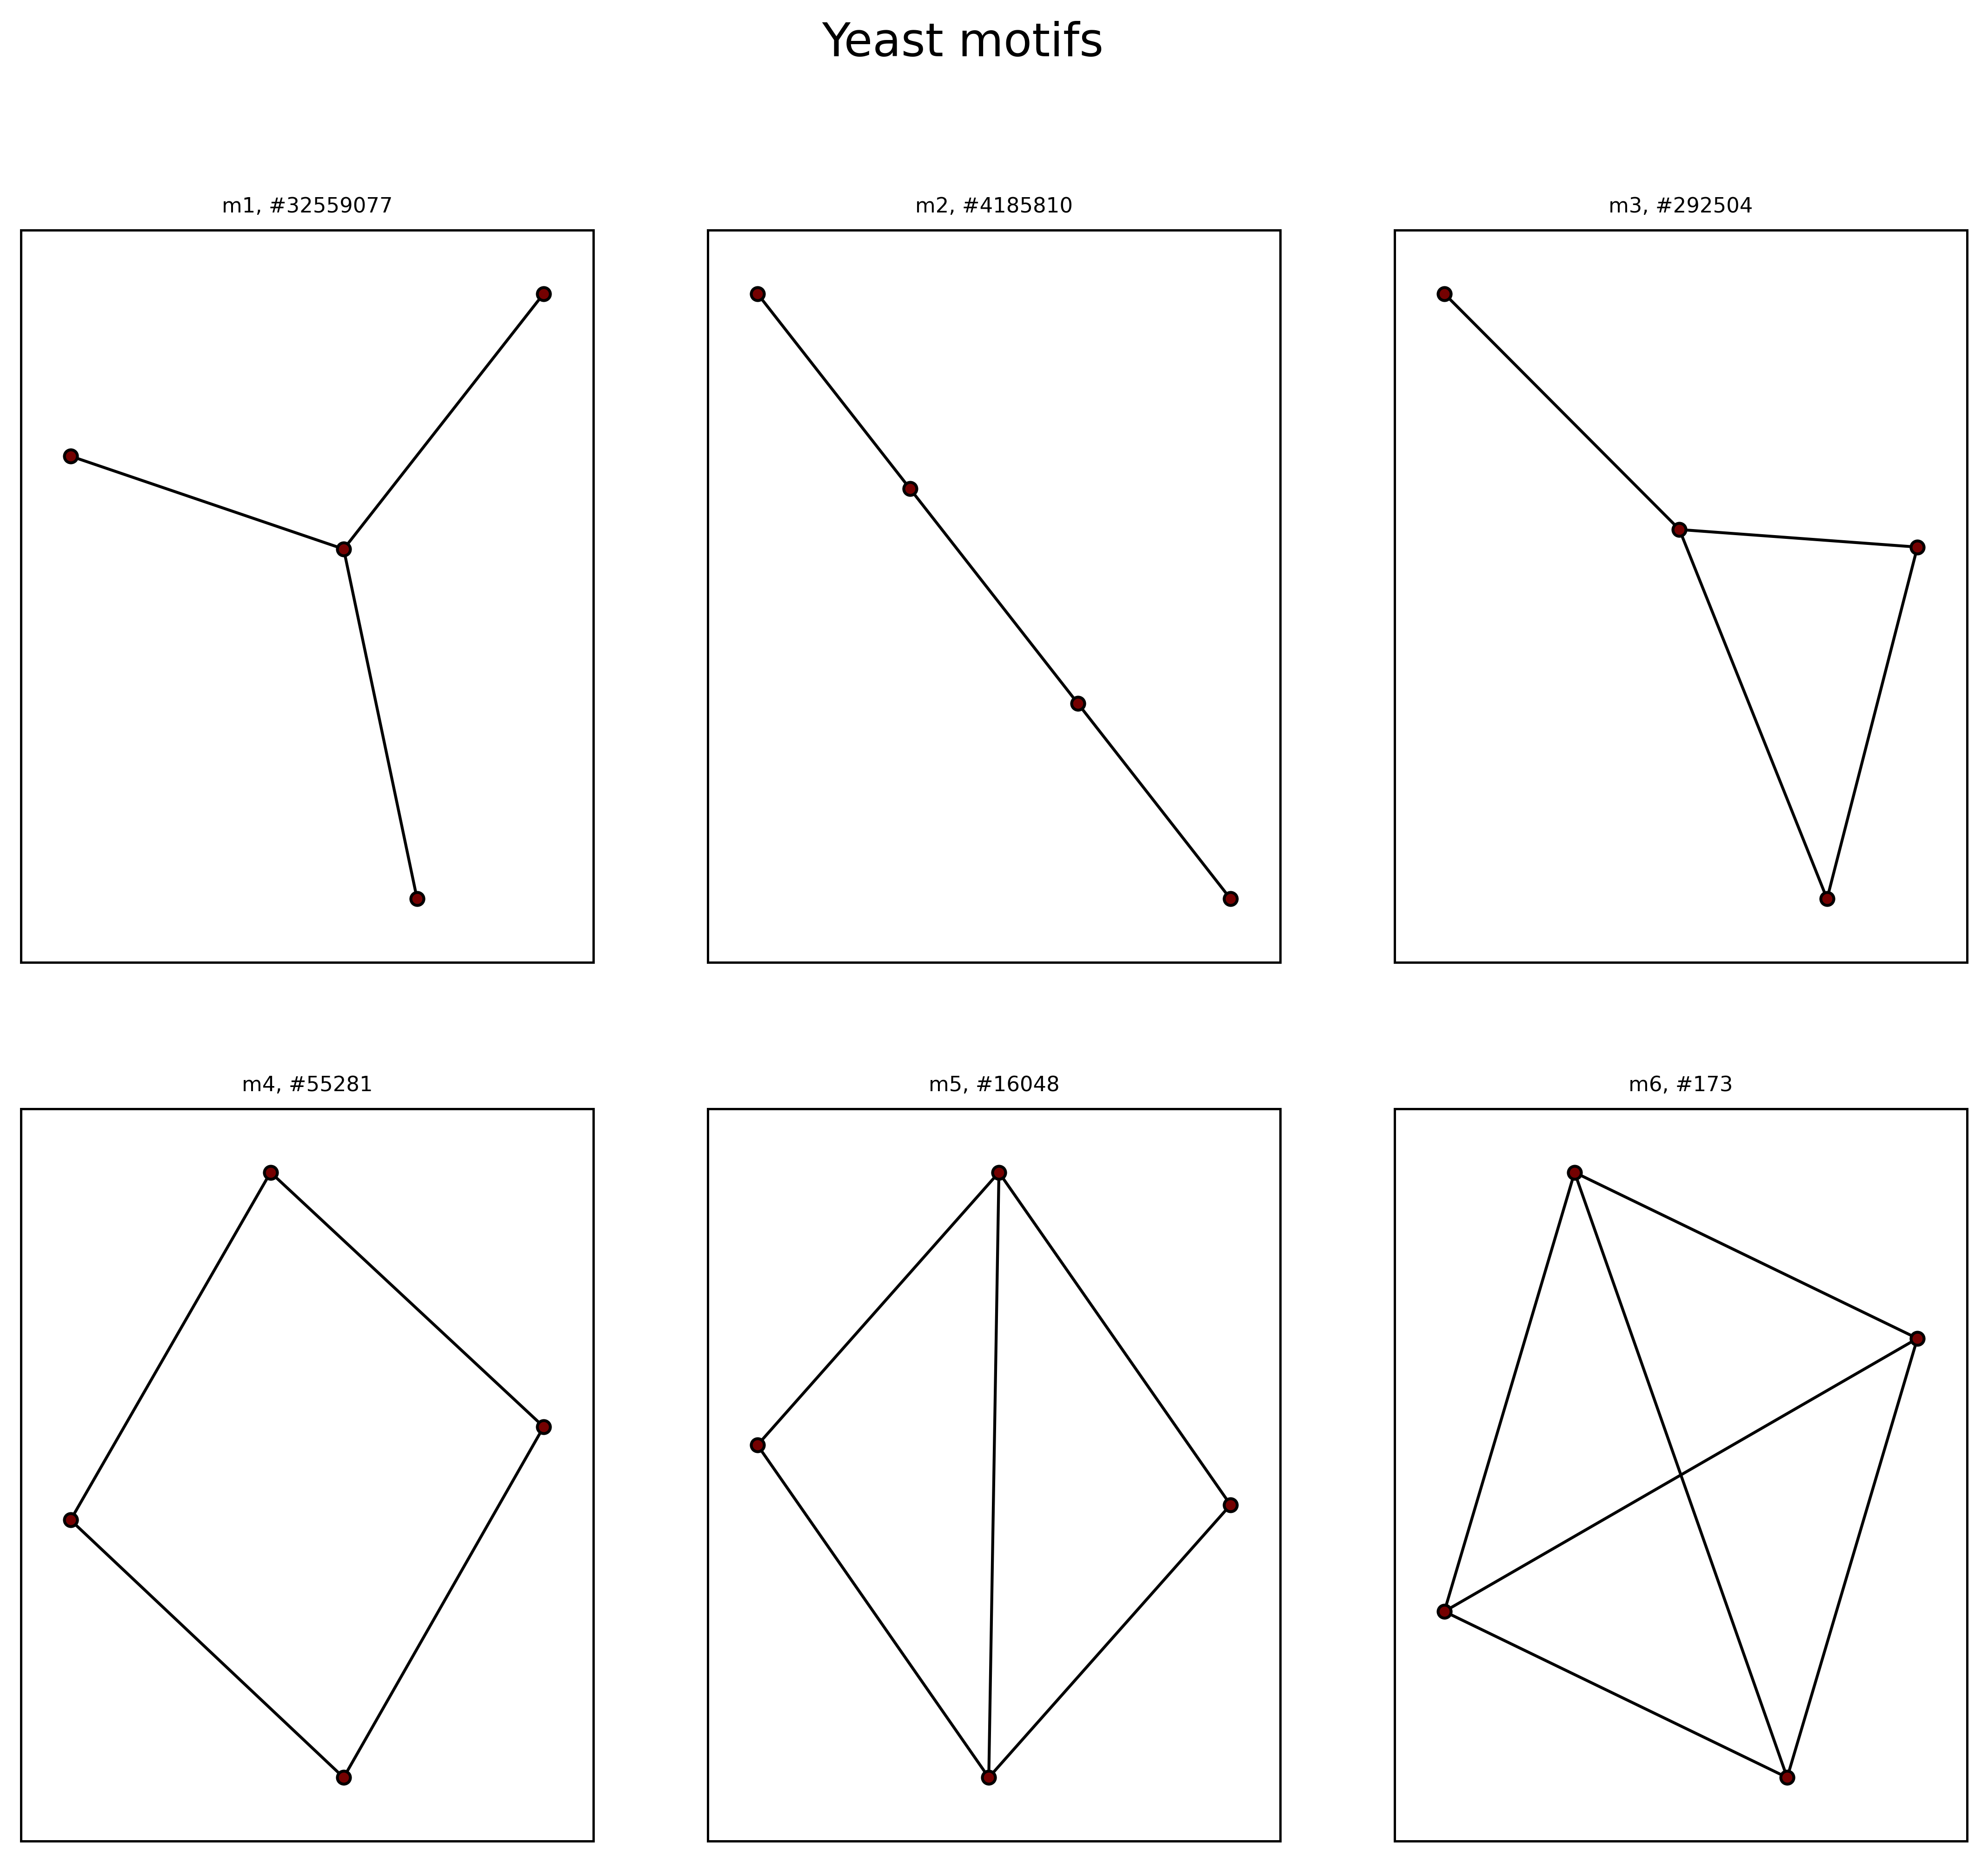

In [25]:
subg_size = 4
graph = no_self_yeast_g

motiflist   = gt.motifs(graph,subg_size)
motifs_nx = list()
for subg in motiflist[0]:
    el = list() 
    el += subg.iter_edges()
    motifs_nx += [nx.from_edgelist(el,create_using=nx.Graph())]
print(len(motifs_nx))
sig_list = gt.motif_significance(graph,subg_size,shuffle_model="erdos")
### Plot
n_motifs    = len(motiflist[0])
base        = math.ceil(math.sqrt(n_motifs))
height      = math.ceil(n_motifs/base)
fig, ax     = plt.subplots(height, base, figsize=(12, 10))
fig.suptitle("Yeast motifs",fontsize=16)
for i,motif in enumerate(motifs_nx,1):
    try:
        y = ((i-1) % base)
        x = math.floor((i-1)/base)
        ax[x,y].set_title(f"m{i}, #{motiflist[1][i-1]}")
        # gt.graph_draw(motif,mplfig=ax[x,y],nodesfirst=True)
        # nx.draw_networkx(motif,ax=ax[x,y],with_labels=False)
        qt_draw(g=motif,axis_pos=ax[x,y])
    except IndexError:
        print(i,x,y)
# len(sig_list[0])
# n = list()
# for i in range(1,n_motifs+1):
#     n += [f"m{i}"]
# ax[2,3].bar(n,sig_list[1],color="darkred",edgecolor="black",linewidth=1)
# ax[2,3].set_title("Z-scores")

In [26]:
xx = range(1,7)

In [1]:
plt.bar(xx,sig_list[1],color="darkred",edgecolor="black",linewidth=1)

NameError: name 'plt' is not defined